In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Generate a synthetic dataset
np.random.seed(42)
num_samples = 500

data = {
    'Date': pd.to_datetime(np.random.choice(pd.to_datetime(['2023-01-15', '2023-02-20', '2023-03-10']), num_samples)),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Books'], num_samples),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_samples),
    'Units_Sold': np.random.randint(1, 100, size=num_samples),
    'Unit_Price': np.random.choice([19.99, 29.99, 49.99, 99.99, 149.99], num_samples),
    'Customer_Satisfaction': np.random.uniform(1, 5, size=num_samples).round(1),
}

df = pd.DataFrame(data)

# Create calculated columns
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
df['Profit_Margin'] = np.random.uniform(0.1, 0.4, size=num_samples)
df['Profit'] = df['Total_Sales'] * df['Profit_Margin']

# Introduce some correlation
df['Marketing_Spend'] = df['Total_Sales'] * np.random.uniform(0.1, 0.2) + np.random.normal(0, 50, num_samples)
df.loc[df['Product_Category'] == 'Electronics', 'Total_Sales'] *= 1.5
df.loc[df['Region'] == 'East', 'Total_Sales'] *= 1.2

df.head()

,Date,Product_Category,Region,Units_Sold,Unit_Price,Customer_Satisfaction,Total_Sales,Profit_Margin,Profit,Marketing_Spend
0,2023-03-10,Clothing,East,71,29.99,4.4,2555.148,0.338197,720.119309,376.246436
1,2023-01-15,Clothing,East,1,149.99,3.7,179.988,0.249177,37.374025,8.048884
2,2023-03-10,Home Goods,North,96,49.99,4.2,4799.040,0.201933,969.085703,720.300050
3,2023-03-10,Clothing,North,13,19.99,4.1,259.870,0.361641,93.979571,5.439060
4,2023-01-15,Books,South,94,19.99,1.6,1879.060,0.263454,495.046489,289.748277


1. Line Plot

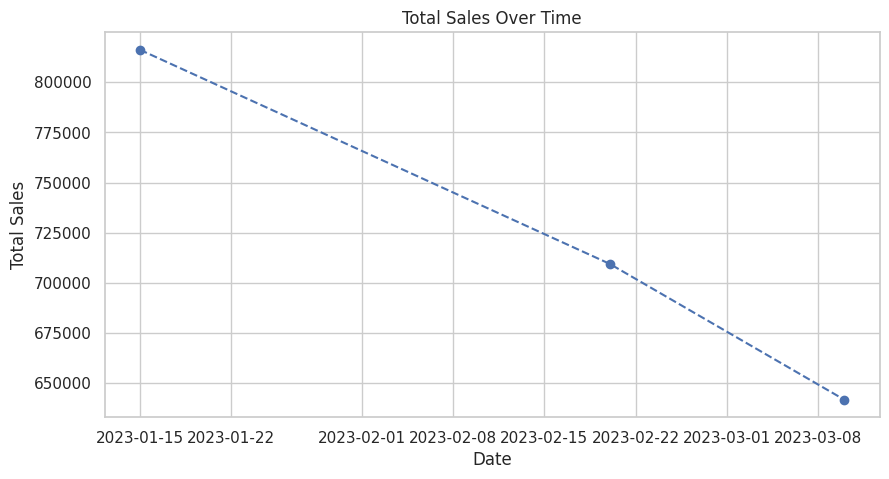

In [2]:
# Prepare data for time series plot
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], marker='o', linestyle='--')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

2. Bar Chart

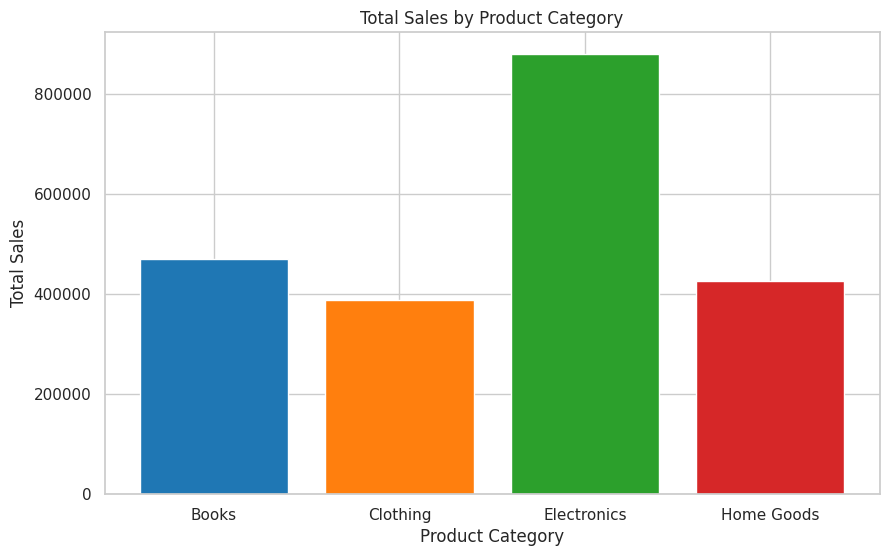

In [3]:
# Prepare data
category_sales = df.groupby('Product_Category')['Total_Sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Product_Category'], category_sales['Total_Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

3. Histogram

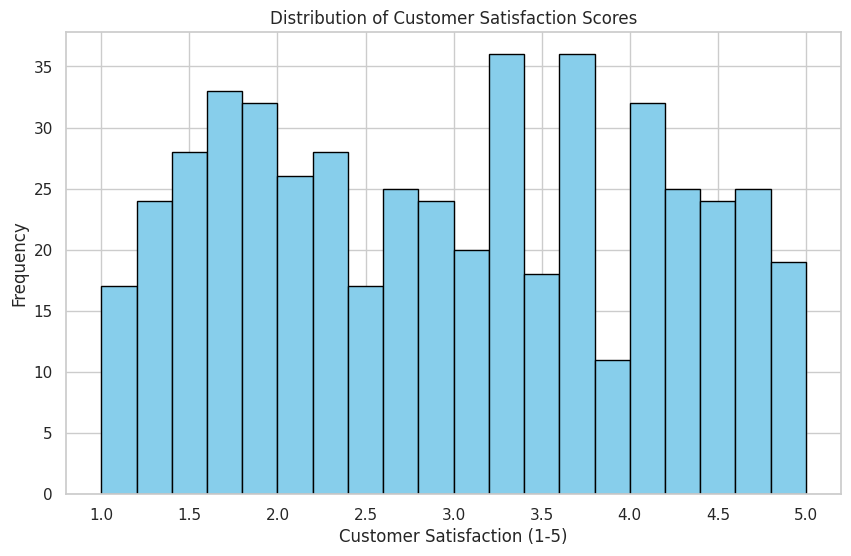

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Satisfaction'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Customer Satisfaction (1-5)')
plt.ylabel('Frequency')
plt.show()

4. Scatter Plot

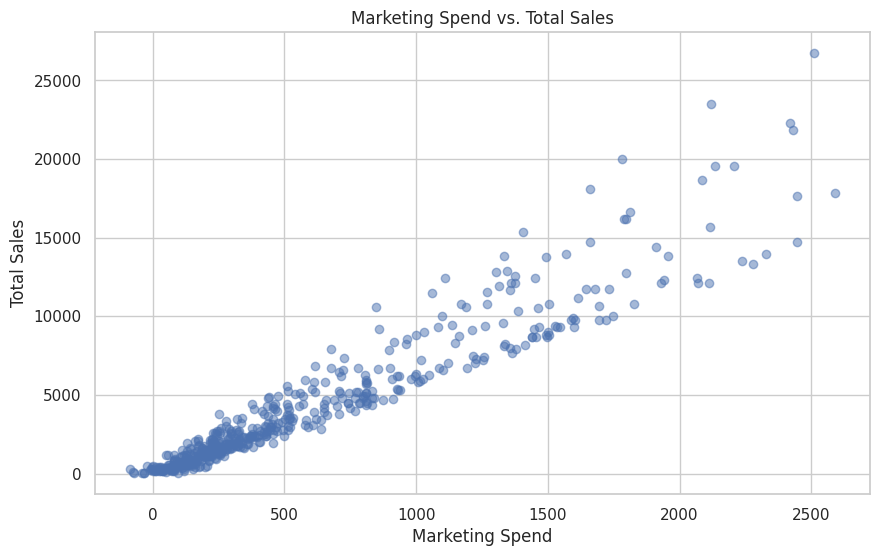

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing_Spend'], df['Total_Sales'], alpha=0.5)
plt.title('Marketing Spend vs. Total Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

5. Pie Chart

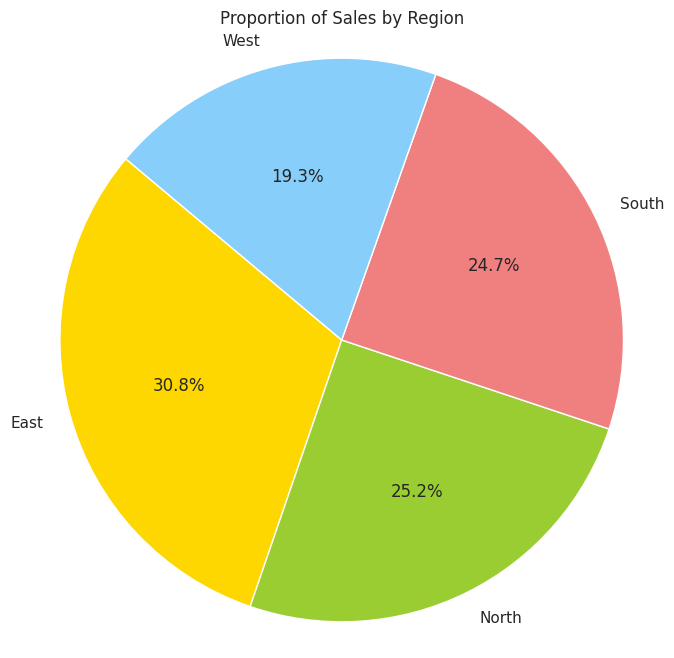

In [6]:
# Prepare data
region_sales = df.groupby('Region')['Total_Sales'].sum()

# Create the plot
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Sales by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

6. Stacked Bar Plot

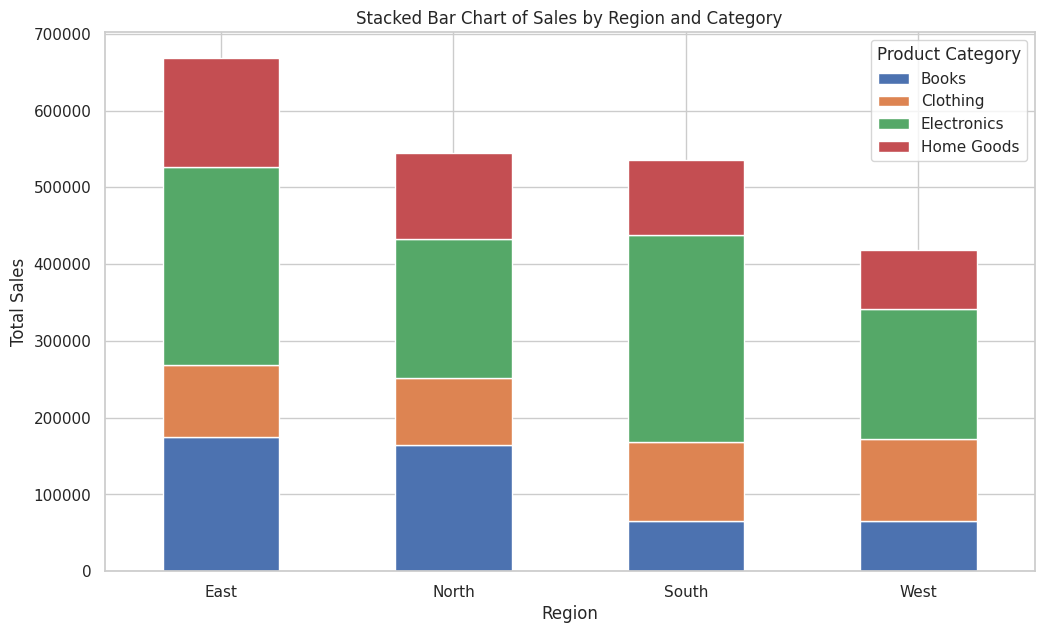

In [7]:
# Prepare data
region_category_sales = df.groupby(['Region', 'Product_Category'])['Total_Sales'].sum().unstack()

# Create the plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Bar Chart of Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

7. Subplots

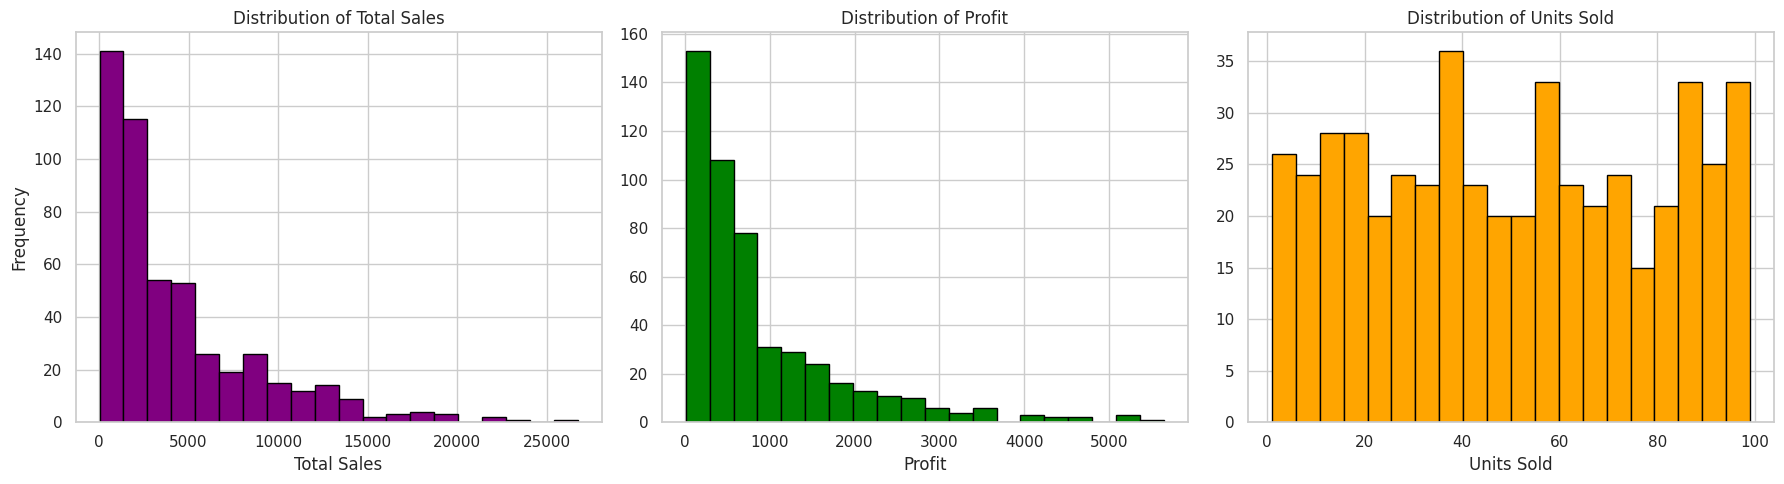

In [8]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histograms on each subplot
axes[0].hist(df['Total_Sales'], bins=20, color='purple', edgecolor='black')
axes[0].set_title('Distribution of Total Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Profit'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution of Profit')
axes[1].set_xlabel('Profit')

axes[2].hist(df['Units_Sold'], bins=20, color='orange', edgecolor='black')
axes[2].set_title('Distribution of Units Sold')
axes[2].set_xlabel('Units Sold')

plt.tight_layout() # Adjust subplots to give some padding.
plt.show()

8. 3D Scatter Plot

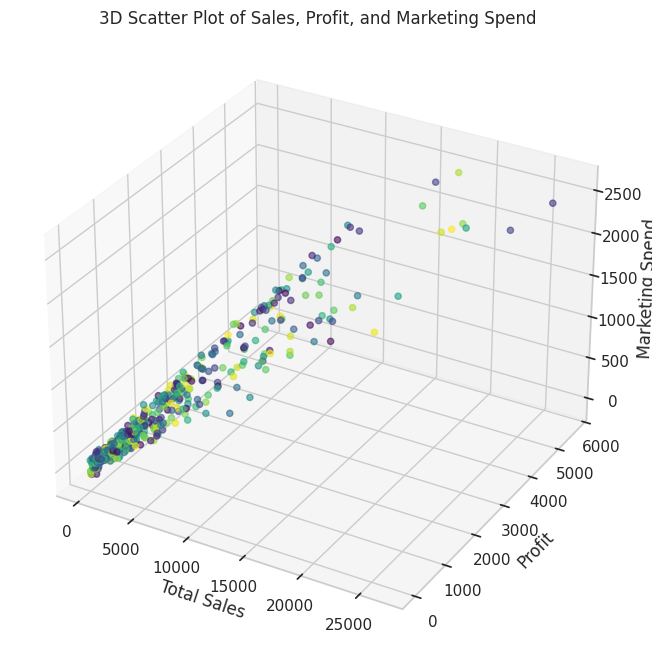

In [9]:
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Total_Sales'], df['Profit'], df['Marketing_Spend'], c=df['Customer_Satisfaction'], cmap='viridis', alpha=0.6)

ax.set_title('3D Scatter Plot of Sales, Profit, and Marketing Spend')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Marketing Spend')

plt.show()

9. Enhanced Scatter Plot

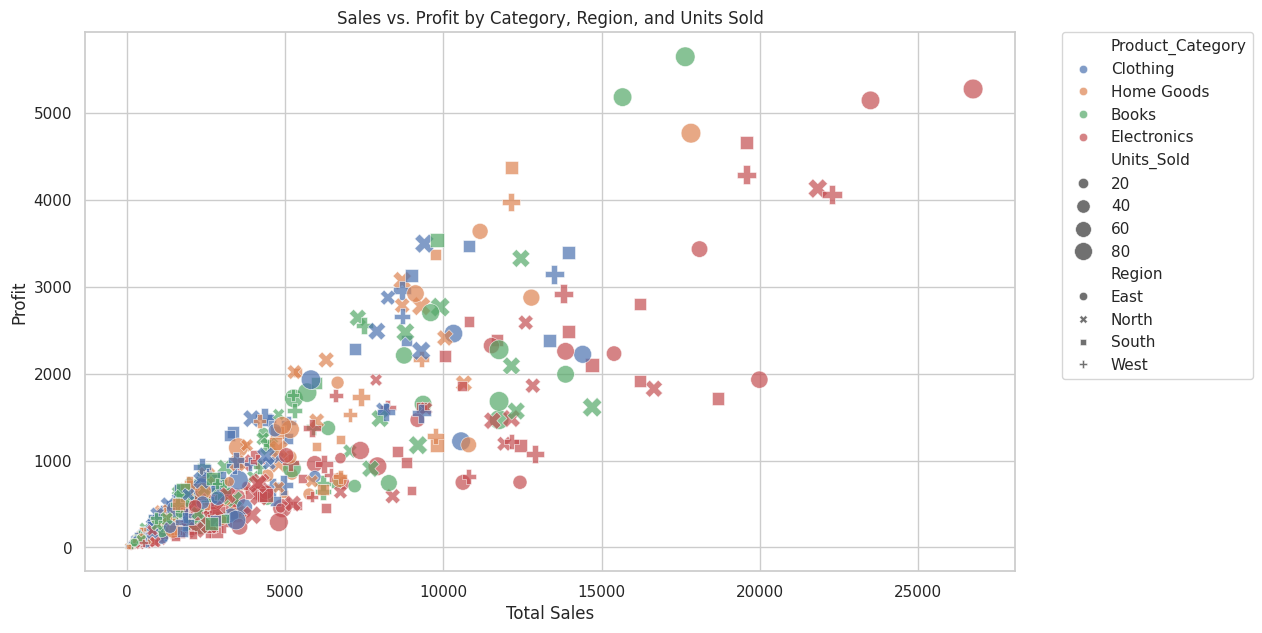

In [10]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Total_Sales',
    y='Profit',
    hue='Product_Category', # Color points by category
    size='Units_Sold',      # Size points by units sold
    style='Region',         # Style markers by region
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('Sales vs. Profit by Category, Region, and Units Sold')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

10. Distribution Plot

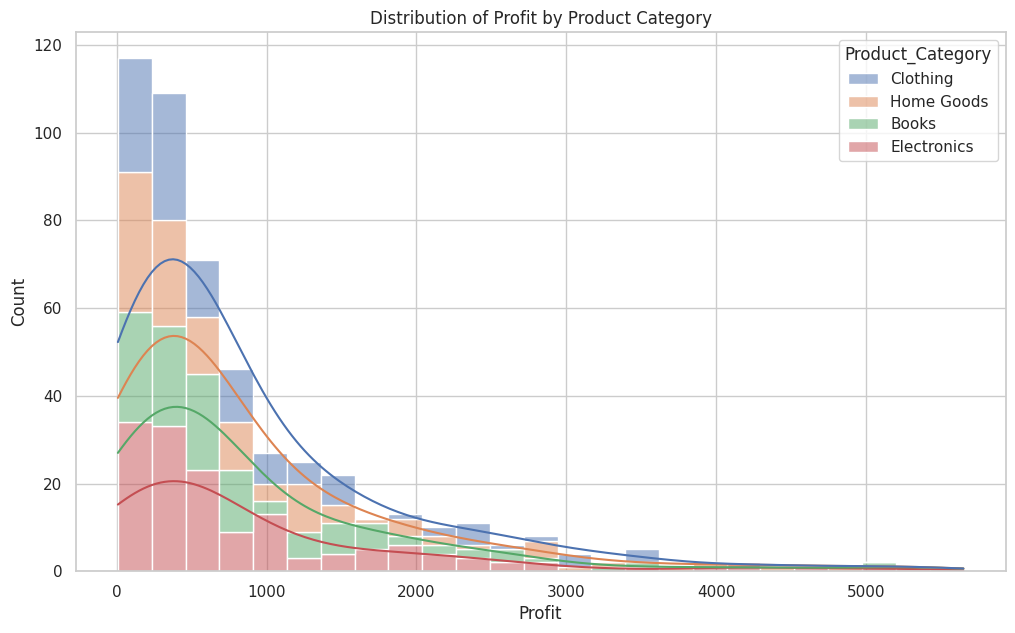

In [11]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Profit', hue='Product_Category', kde=True, multiple="stack")
plt.title('Distribution of Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

11. Box Plot

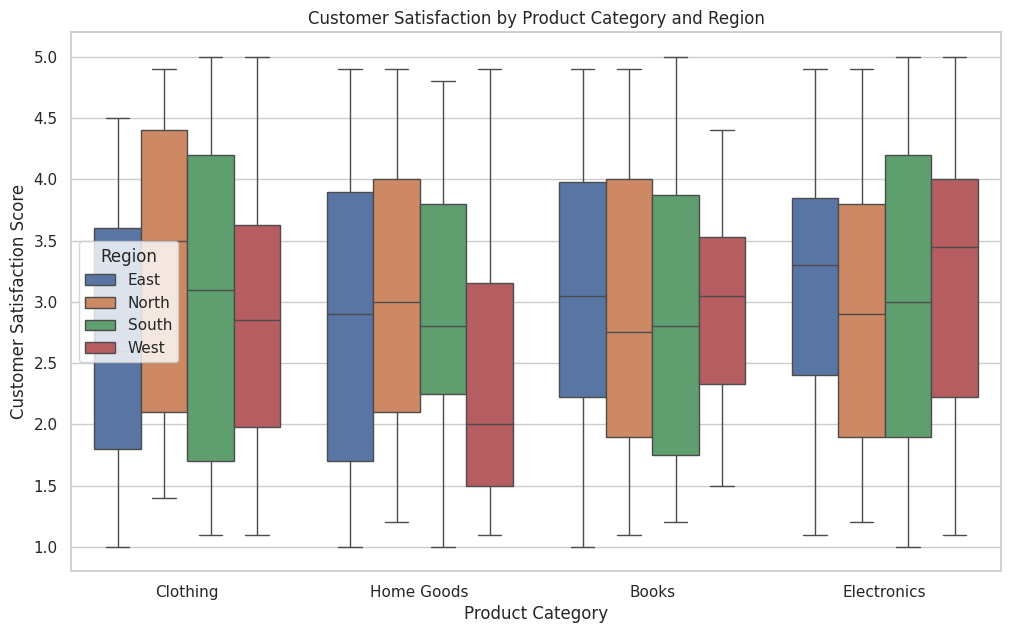

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region')
plt.title('Customer Satisfaction by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Customer Satisfaction Score')
plt.show()

12. Violin Plot

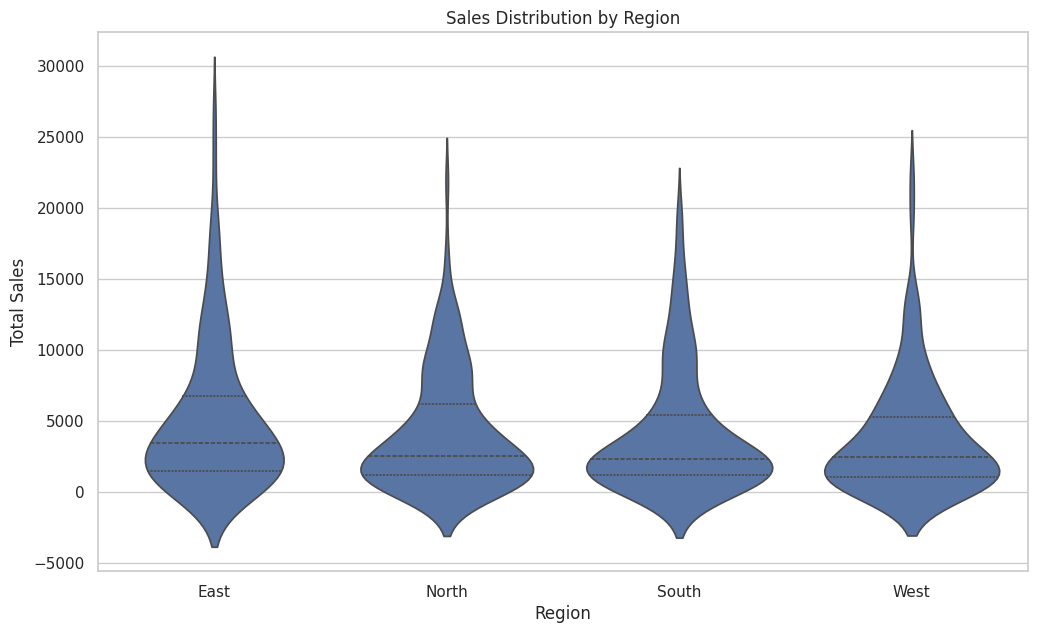

In [13]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Region', y='Total_Sales', inner='quartile')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

13. Swarm Plot

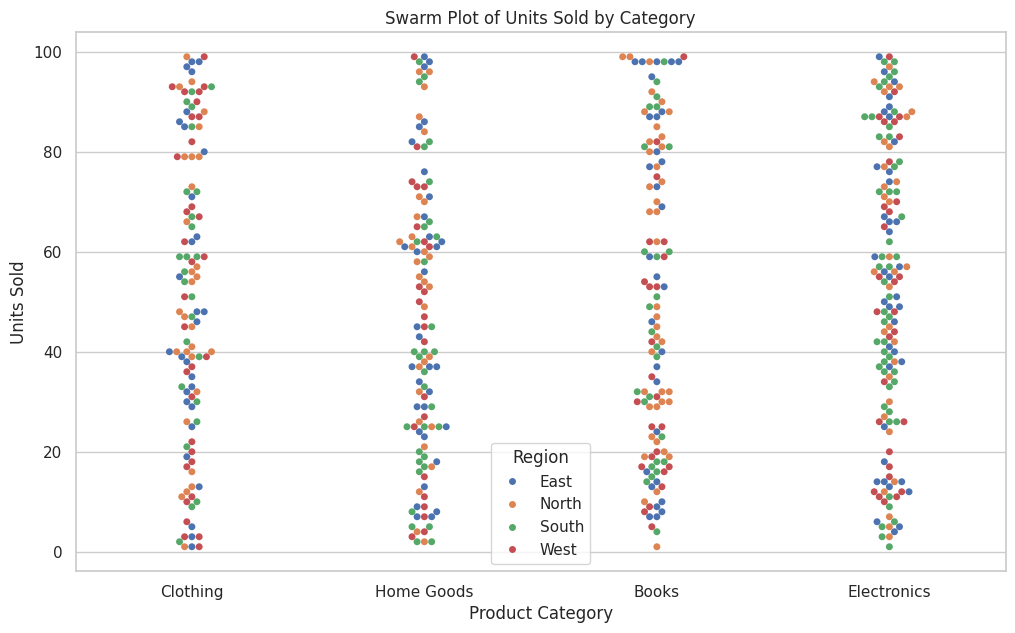

In [14]:
plt.figure(figsize=(12, 7))
sns.swarmplot(data=df, x='Product_Category', y='Units_Sold', hue='Region')
plt.title('Swarm Plot of Units Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

14. Count Plot

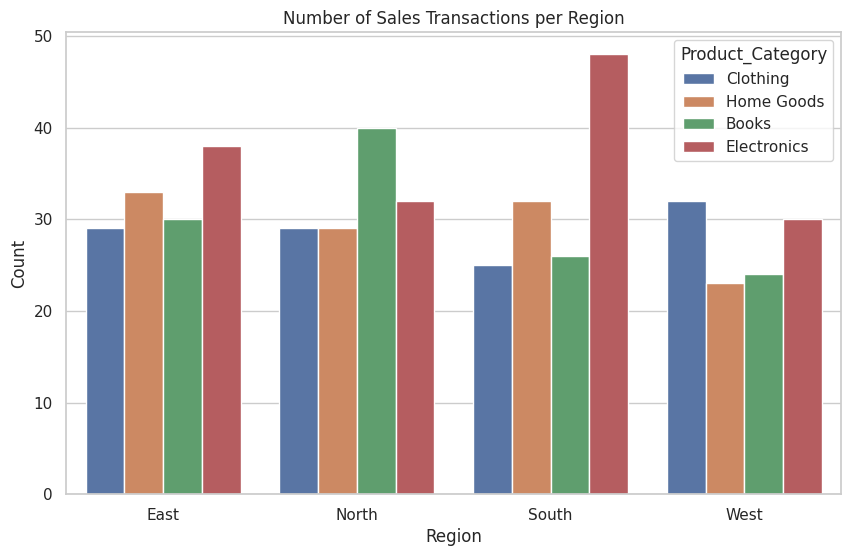

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Product_Category')
plt.title('Number of Sales Transactions per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

15. Heatmap

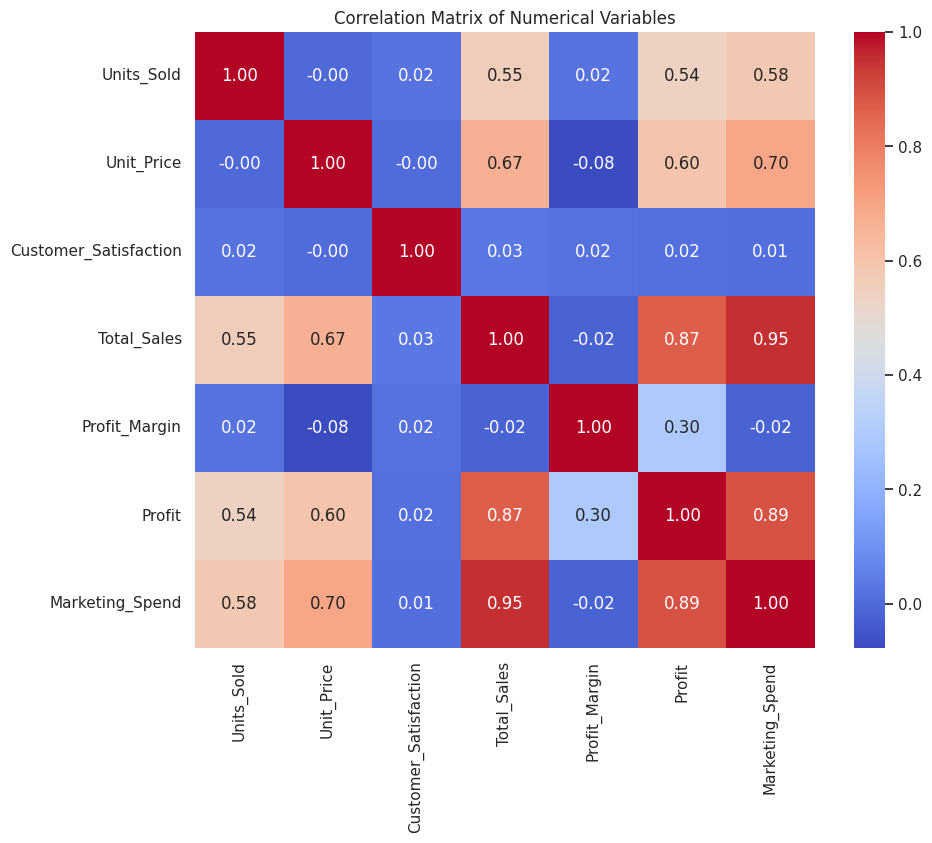

In [16]:
# Select only numeric columns for correlation matrix
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

16. Linear Model Plot

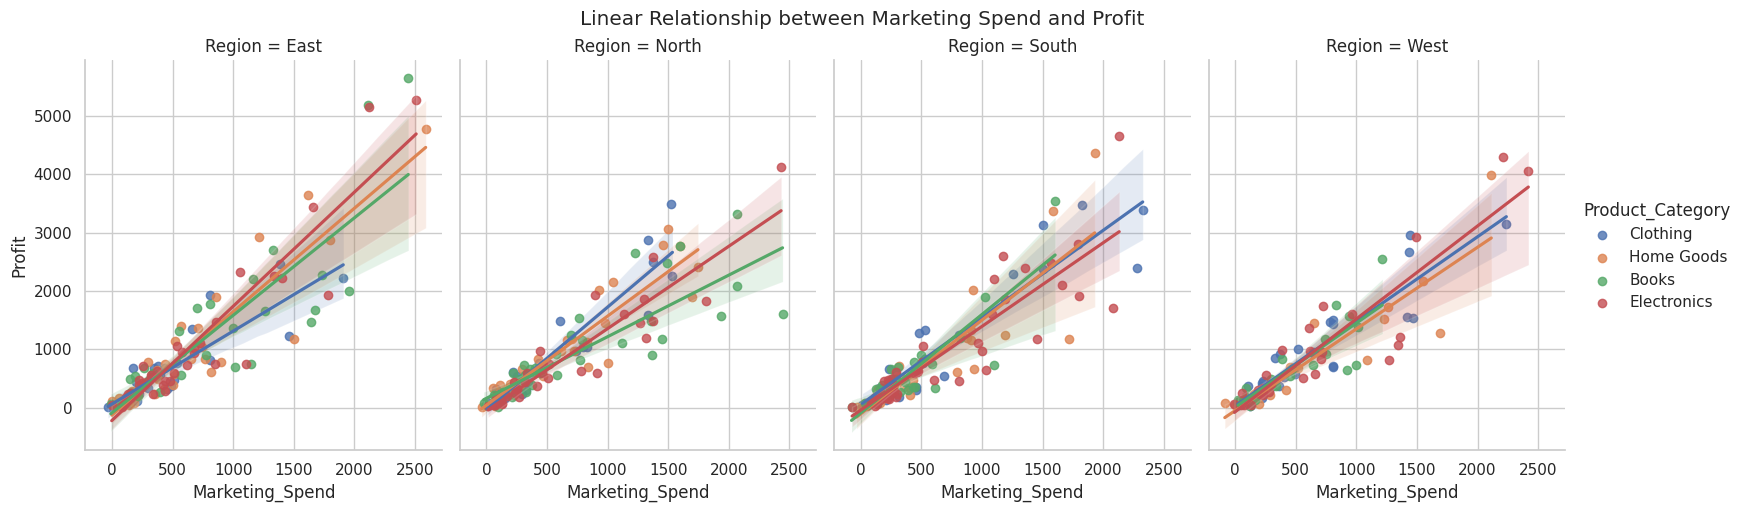

In [17]:
sns.lmplot(
    data=df,
    x='Marketing_Spend',
    y='Profit',
    hue='Product_Category',
    col='Region', # Create columns for each region
    height=5,
    aspect=0.8
)
plt.suptitle('Linear Relationship between Marketing Spend and Profit', y=1.02)
plt.show()


17. Joint Plot

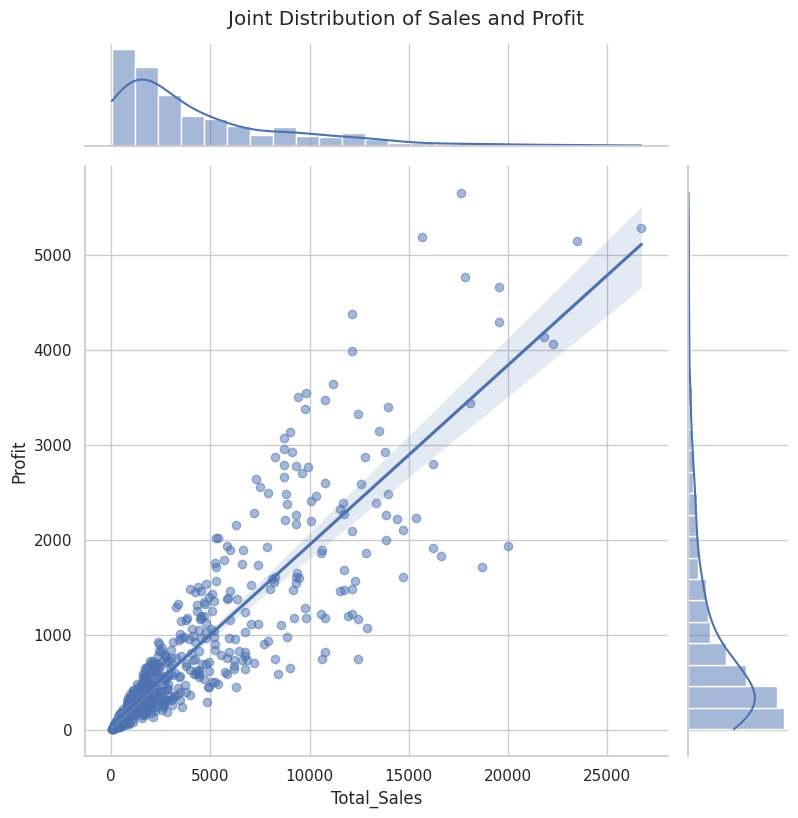

In [18]:
sns.jointplot(data=df, x='Total_Sales', y='Profit', kind='reg', # 'reg' adds a regression line
              height=8, scatter_kws={'alpha': 0.5})
plt.suptitle('Joint Distribution of Sales and Profit', y=1.02)
plt.show()

18. Pair Plot


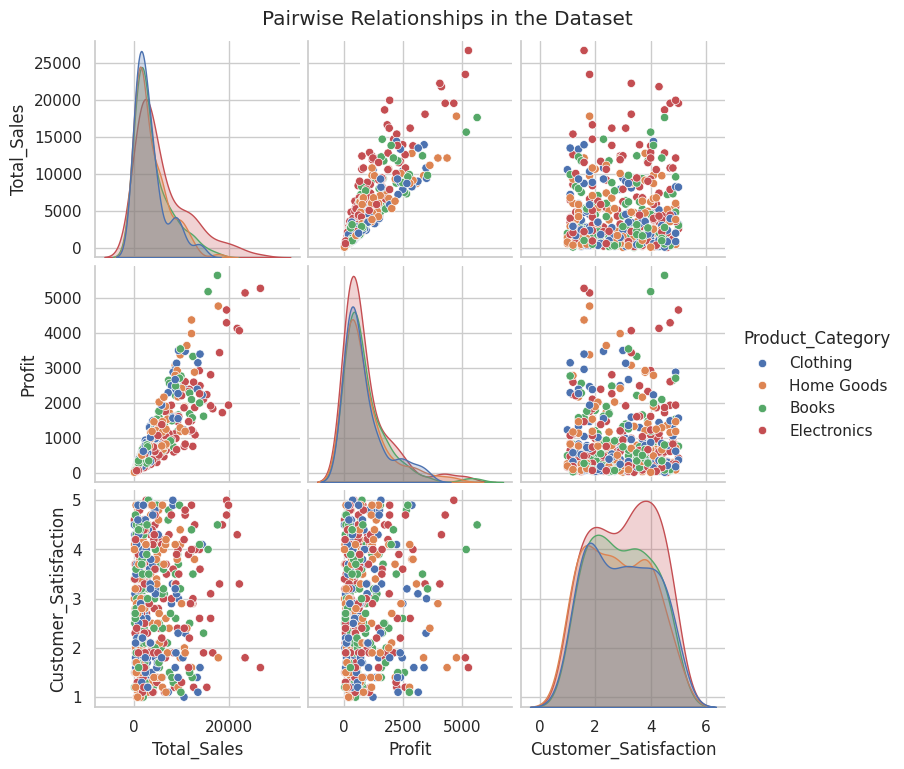

In [19]:
# Using a subset of columns for clarity
subset_df = df[['Total_Sales', 'Profit', 'Customer_Satisfaction', 'Product_Category']]
sns.pairplot(subset_df, hue='Product_Category', diag_kind='kde')
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

19. FacetGrid

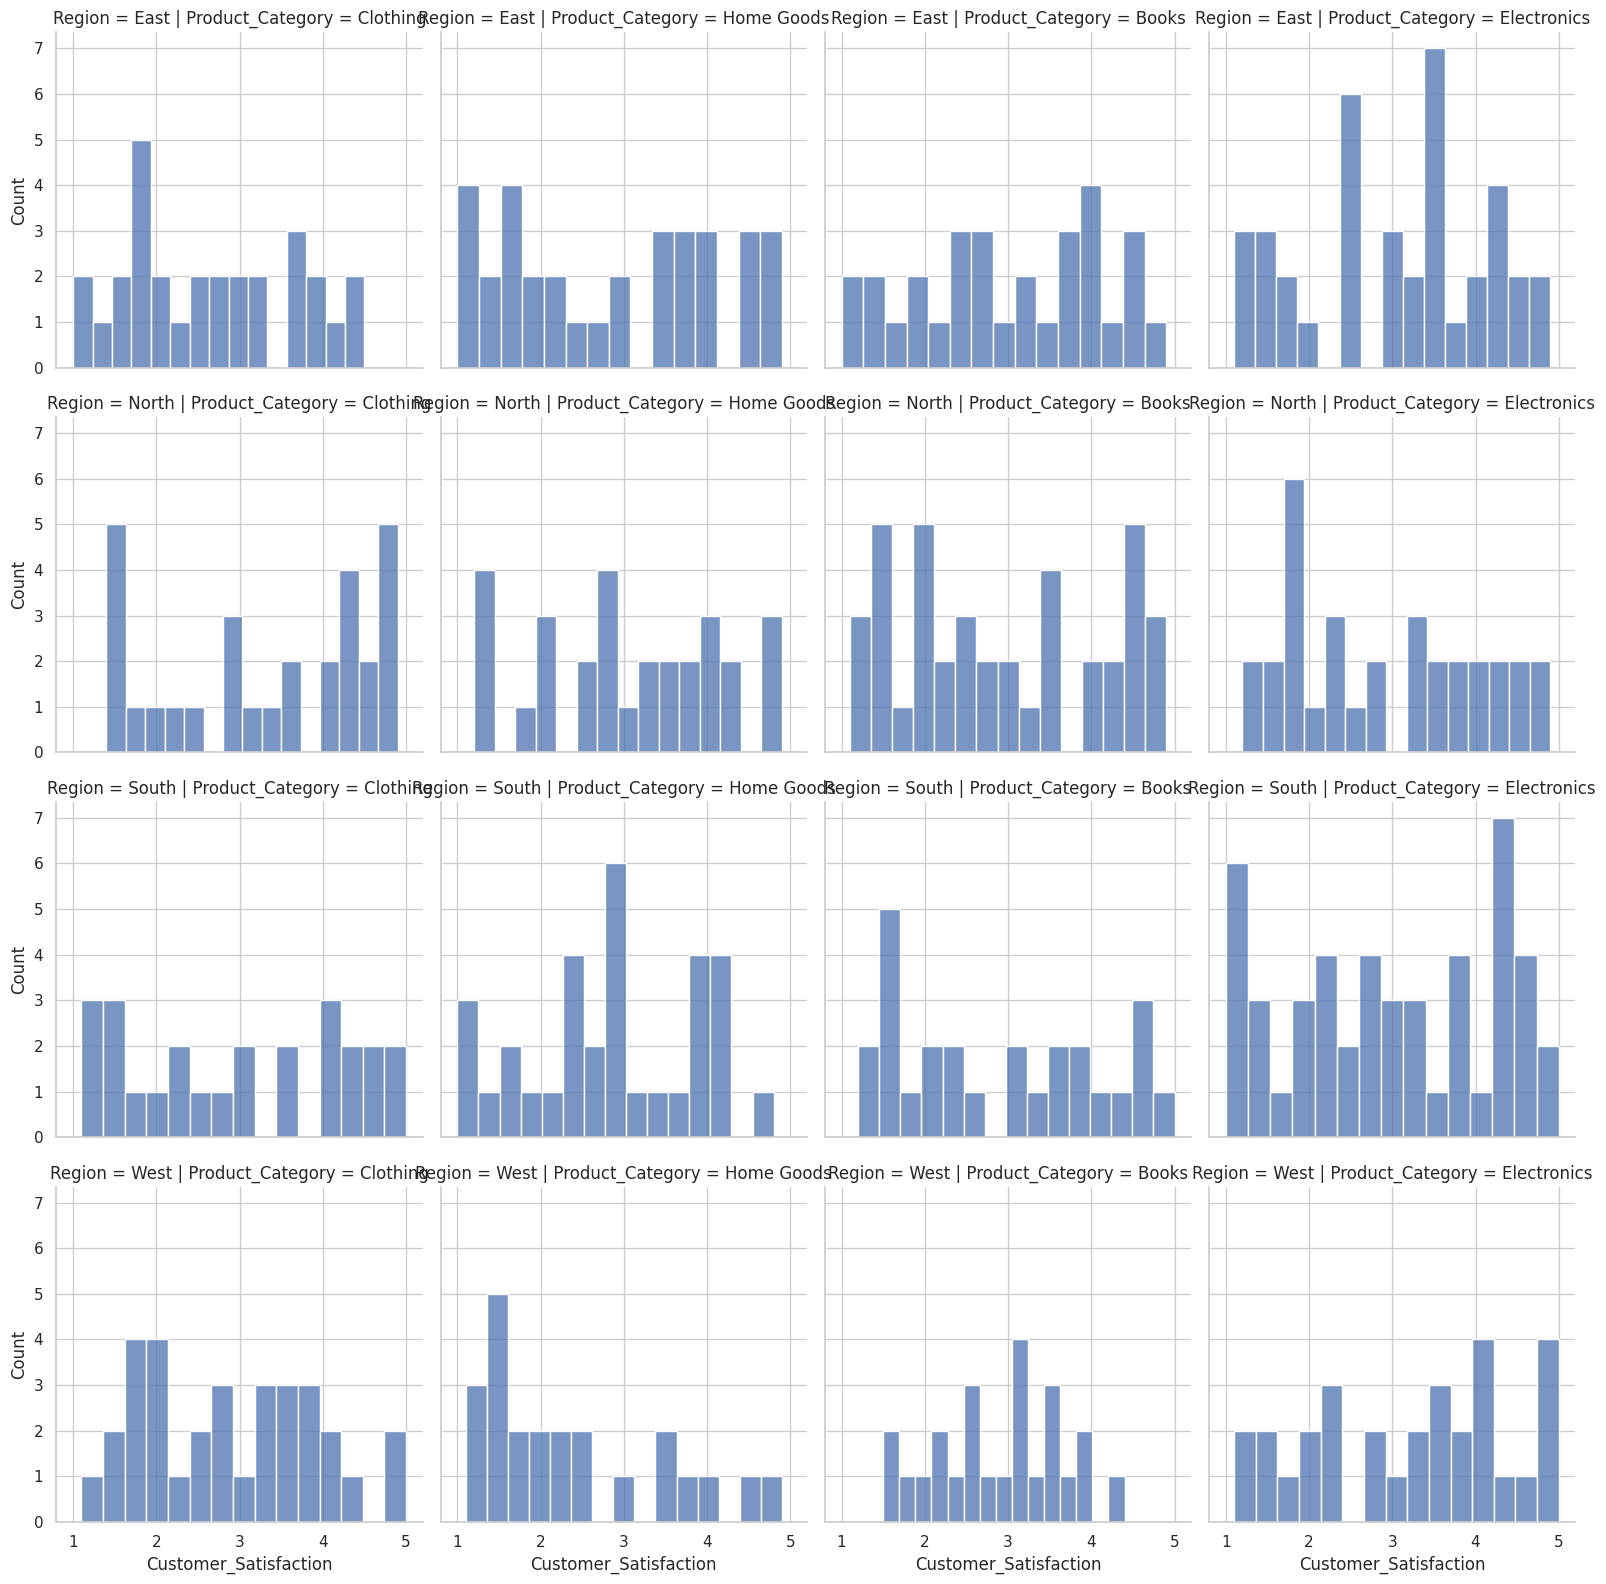

In [20]:
g = sns.FacetGrid(df, col="Product_Category", row="Region", height=4, aspect=1)
g.map(sns.histplot, "Customer_Satisfaction", bins=15)
g.add_legend()
plt.show()

20. Point Plot

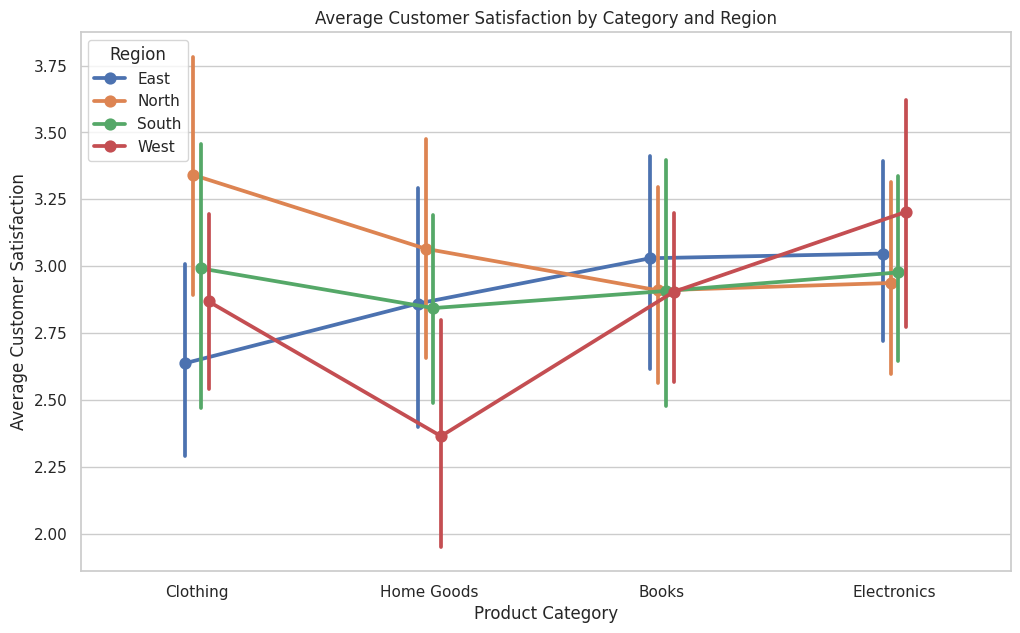

In [21]:
plt.figure(figsize=(12, 7))
sns.pointplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region', dodge=True)
plt.title('Average Customer Satisfaction by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Average Customer Satisfaction')
plt.show()

21. Empirical Cumulative Distribution Plot (ecdfplot)

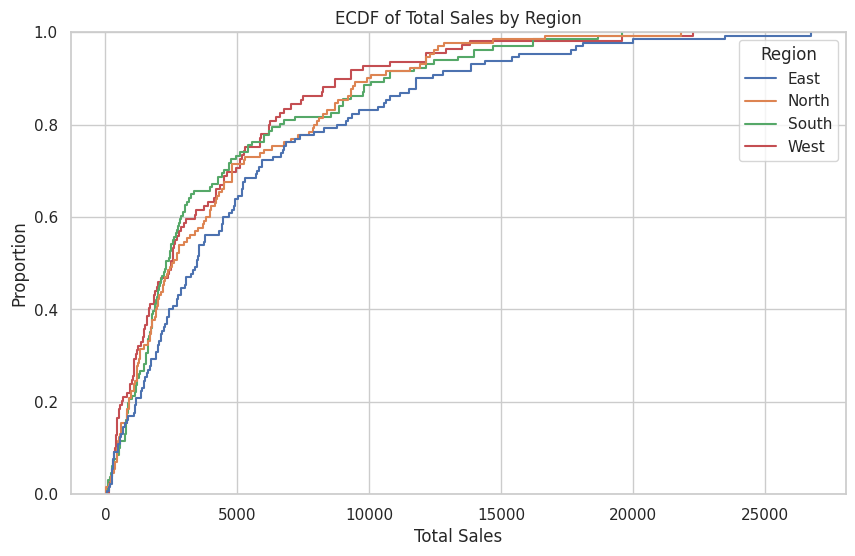

In [22]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Total_Sales', hue='Region')
plt.title('ECDF of Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Proportion')
plt.show()

22. Rug Plot

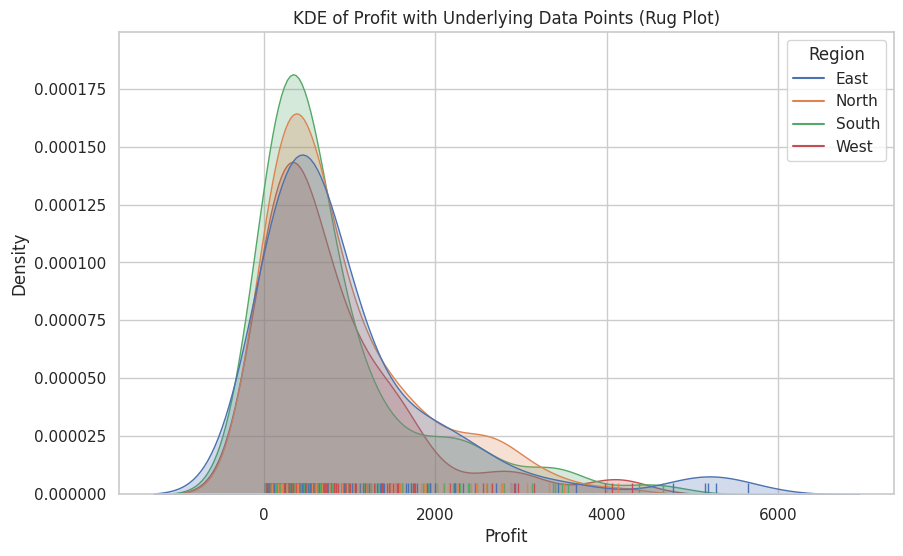

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Profit', hue='Region', fill=True)
sns.rugplot(data=df, x='Profit', hue='Region')
plt.title('KDE of Profit with Underlying Data Points (Rug Plot)')
plt.xlabel('Profit')
plt.show()

23. Cluster Map

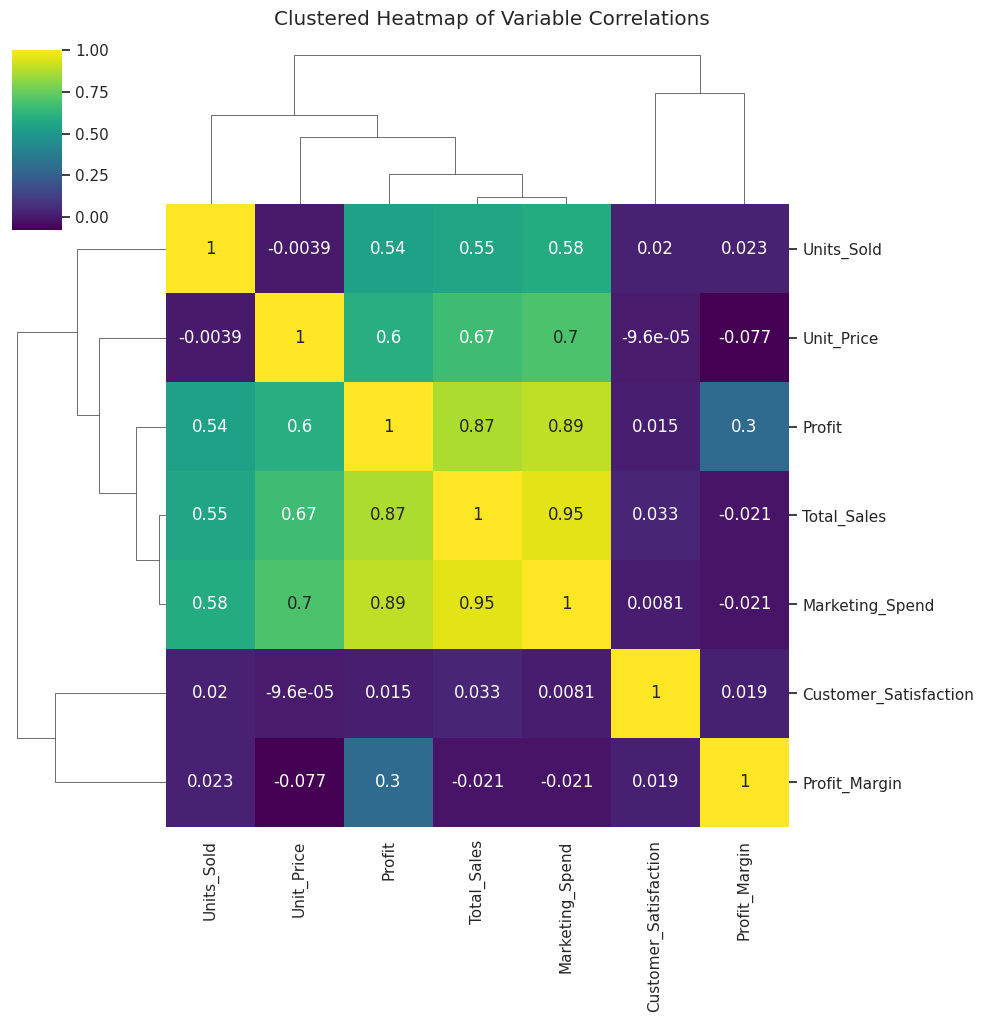

In [24]:
# Use the correlation matrix from the heatmap example
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

sns.clustermap(corr_matrix, annot=True, cmap='viridis', figsize=(10, 10))
plt.suptitle('Clustered Heatmap of Variable Correlations', y=1.02)
plt.show()

24. Boxen Plot

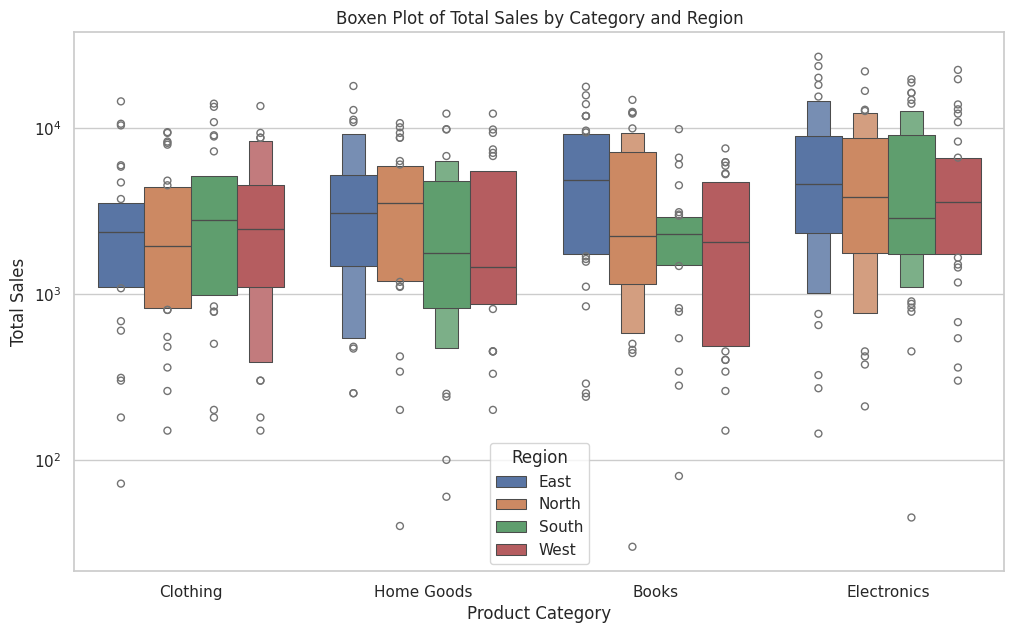

In [25]:
plt.figure(figsize=(12, 7))
sns.boxenplot(data=df, x='Product_Category', y='Total_Sales', hue='Region')
plt.title('Boxen Plot of Total Sales by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.yscale('log') # Use log scale for better visibility of distributions
plt.show()

25. Ridge Plot (FacetGrid with KDE)

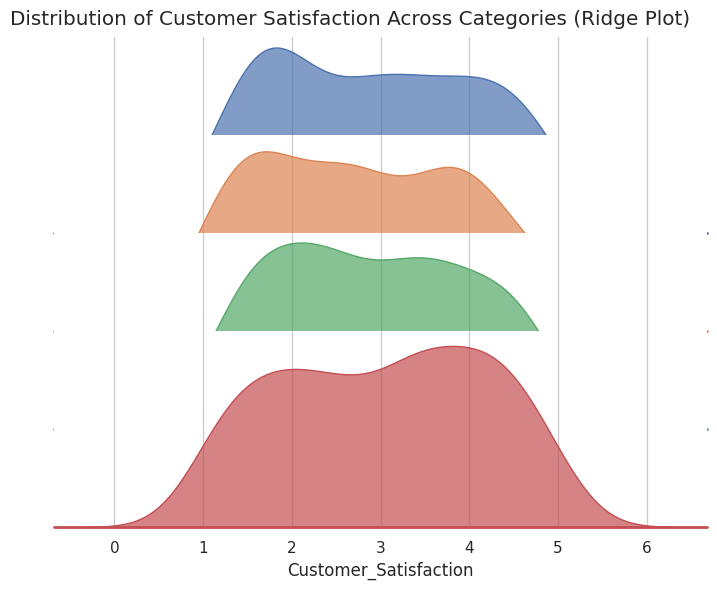

In [26]:
# Create the FacetGrid
g = sns.FacetGrid(df, row="Product_Category", hue="Product_Category", aspect=5, height=1.5)

# Map the density plots
g.map(sns.kdeplot, "Customer_Satisfaction", fill=True, alpha=0.7)

# Add a white line at the bottom of each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Set titles and clean up the plot
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.suptitle('Distribution of Customer Satisfaction Across Categories (Ridge Plot)', y=0.98)
plt.show()